# Introduction to Deep Learning with Python

## Chapter 2: Multilayer Perceptrons

### 2.1  Network Architecture

Recall that a learning problem can be understood as approximating some function **$f^*$**, e.g. $y = f^*(x)$ maps the **input $x$** to some **output $y$**. And a learning algorithmen tries to learn the values of parameters $\theta$ so that a given function $y = f(x;\theta)$ approximates $f^*$ in the best possible way.   

In the case of the perceptron, $f(x;\theta)$ was the weighted some of the inputs and $\theta$ was the weight vector ${[w_1, w_2, ..., w_n]}$ (and the bias $b)$. A multiplayer perceptron (MLP), also called Deep Learning, Deep feedforwards network, or feedforwards neural network, expands this idea by composing many functions together:

$$f(x) = f^{(3)}(f^{(2)}(f^{(1)}(x)))$$

Such directed acyclic graph, were $f^{(1)}$ is called the **first layer**, $f^{(2)}$ is called the **second layer**, and $f^{(3)}$ is called the **third layer**, can be seen as the typical archictecture used in modern neural networks. 

![Perceptron](00_ressources/img/chapter_2/network_architecture.jpeg)

In chapter 1.2, we saw that learning $w$ is not that problematic. The real challange is having the rights inputs $x$. One way to solve this problem is to manually engineer a feature vector $\phi(x)$ from the input vector $x$ using a nonlinear transformation $\phi$. We than use $\phi(x)$ instead of $x$ to solve the problem at hand. 

As already mentioned, support vector machines use an alternative method were $\phi$ is a predefined function such as the radial basis function (RBF) kernel, which proven to be helpful in a lot of problems.  

In contrast, deep learning does neither use manually engineered features nor predefined functions but tries to learn $\phi$ from the given data:

$$y = f(x;\theta,w) = \phi(x, \theta)^{T}w,$$

where $\theta$ is a parameter vector used to learn a function $\phi$, and $w$ is a weight vector that maps from $\phi(x)$ to $y$. Or in other words, given a generic function $\phi$ parametrized as $\phi(x;\theta)$, let an algorithmen find the best $\theta$ to have a useful new repsentation (feature) of $x$.


### 2.2 XOR Problem revisited

Recall the **XOR** problem from last chapter where $X = \{[0,0], [0,1], [1,0], [1,1]\}$ and $y = \{0,1,1,0\}$. A single perceptron unit was not able to learn this problem correctly. Let's see whether a more complex models can handle it.

Similar to the example above, a neural network with one hidden layer can be written as:

$$f(x;w_1,b_1,w_2,b_2) = f^{(2)}(f^{(1)}(x)),$$

where $w_1$ is the weight vector of the hidden layer, $b_1$ is the bias vector of the hidden layer, $w_2$ is the weight vector from the hidden layer to the output layer, and $b_2$ is the corresponding bias vector.

Further one can unchain the expression and end up with 

$$h^* = f^1(x;w_1,b_1),$$

where $h^*$ is the linear output from the first hidden layer and

$$y=f^2(h;w_2,b_2)$$

is the linear output from the output layer. Finally, let $h=g(x;w_1,b_1)$ be a nonlinear activation function to the first hidden layer defined as $g(z) = max\{0,z\}$. 

In [2]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Same data (this time without bias)
X = np.array([[0,0], 
              [0,1], 
              [1,0], 
              [1,1]]
            )

# Updated label
y = np.array([0,1,1,0])

# Weights of hidden units
w_1 = np.array([[1,1],
              [1,1]
             ])

# Bias of hidden units
b_1 = np.array([0,-1])

# Weights to output
w_2 = np.array([1,-2])

# Bias to output
b_2 = 0

Starting with the hidden layer, evaluate $f(x;w_1,b_1)$ by calculating $xw_1$:

In [4]:
xw_1 = np.dot(X, w_1)
print(xw_1)

[[0 0]
 [1 1]
 [1 1]
 [2 2]]


... and add bias $b_1$ to the resulting matrix

In [5]:
xw_1b_1 = xw_1 + b_1
print(xw_1b_1)

[[ 0 -1]
 [ 1  0]
 [ 1  0]
 [ 2  1]]


Element-wise applying $max\{0,z\}$ to $xw_1 + b_1$ gives $h$

In [6]:
# Rectified linear unit
def relu(x):
    if x > 0:
        return(x)
    else:
        return(0)

f = np.vectorize(relu)    
h = f(xw_1b_1)
print(h)

[[0 0]
 [1 0]
 [1 0]
 [2 1]]


Given $h$, $y$ can be calculated as $hw_2+b_2$

In [7]:
out = np.dot(h, w_2)
out = out + b_2
print(out)

[0 1 1 0]


Recall that the initial target vector was $y = \{0,1,1,0\}$ and the neural network correctly outputs $\hat{y} = \{0,1,1,0\}$.

### 2.3 Types of hidden Units

In [8]:
%matplotlib inline

The type of a hidden unit is mainly characterised by the *activation function* it uses. The activation function $g(z)$ determines how the unit's input $z$ is transformed to the unit's output. The most commonly used activation functions are:

- Step-function
- Sigmoid
- Rectified Linear 
- Hyperbolic Tangent

Other activation functions:

- Radial basis function (RBF)
- Softplus
- Maxout
- Hard tanh

#### 2.3.1 Step-function

The Step-function, sometimes also called *Hard limiter*, or *threshold function*, is defined as:

$$g(z) = 
\begin{cases}
    0 &\text{if $z < 0$}\cr  
    1 &\text{if $z \geq 0$}
\end{cases}$$

- Used in perceptrons
- Simple all-or-none property

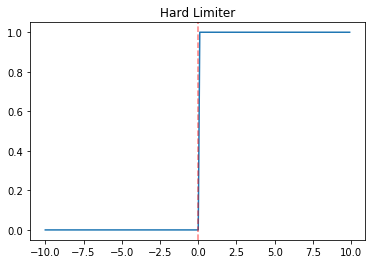

In [9]:
def unit_step(x):
    a = []
    for i in x:
        if i < 0:
            a.append(0)
        else:
            a.append(1)
    return(a)

x = np.arange(-10., 10., 0.1)
y = unit_step(x)
plt.plot(x,y)
plt.axvline(x = 0, color = 'r', alpha = .5, linestyle = 'dashed')
plt.title('Hard Limiter')
plt.show()

#### 2.3.2 Sigmoid function

The main disadvantage of the step-function is it's all-or-none property. In learning, we want to see how small changes in the inputs (mainly the weights) changes the output. With a step-function this is hard, because the outputs either stays the same or flips completly. A natural way to overcome this limitation is the usage of a smoothed out version of a the step function, know as sigmoid:

$$g(z) = \sigma(z) = \frac{1}{1+exp(-az)}$$

with slope parameter $a$ (for $a = 1$ known as the *logistic function*).

- Havely used in deep learning until recent years
- Strongly sensitive for $z\approx0$
- Saturation for both hight and low values of $z$
- Actual value of $\alpha$ often neglectable

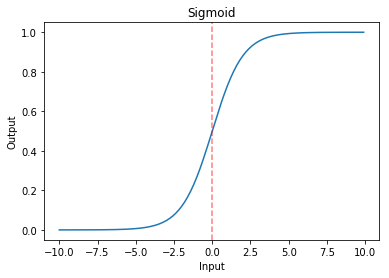

In [10]:
def sigmoid(x):
    a = []
    for i in x:
        a.append(1/(1+math.exp(-i)))
    return(a)

x = np.arange(-10., 10., 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.axvline(x = 0, color = 'r', alpha = .5, linestyle = 'dashed')
plt.title('Sigmoid')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

#### 2.3.2 Rectified Linear

Given the sigmoid's saturation to 0 or 1, the sigmoids's gradient settles to 0 for large and small values of $z$. This can be a problem when we use the gradient for learning (especially in deep neural networks, where this problem ist called *vanishing gradients*).   
The rectified linear function (ReLU), also known as *piecewise linear unit*, solves this problem by having large and increasing gradients whenever the unit is active. It is therefore the most commonly used activation function for deep neural networks:

$$g(z) = max\{0, z\}$$

- Seems to work better than sigmoid in deep neural networks
- Solves vanishing gradient problem
- Gradient not defined for $z=0$, but there are workarounds like *Absolut Value Rectification* ([Jarrett et al. 2009][1]) , *Leaky ReLU* ([Maas et al. 2013][2]), and *Parametric ReLU* [He et al. 2015][3]*
- Sometimes not usable when additional requirements are needed (e.g. in recurrent networks or autoencoders) 

[1]: http://yann.lecun.com/exdb/publis/pdf/jarrett-iccv-09.pdf
[2]: http://ai.stanford.edu/~amaas/papers/relu_hybrid_icml2013_final.pdf
[3]: https://arxiv.org/pdf/1512.03385.pdf

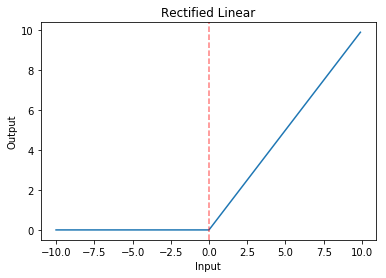

In [11]:
def relu(x):
    a = []
    for i in x:
        if i > 0:
            a.append(i)
        else:
            a.append(0)
    return(a)

x = np.arange(-10., 10., 0.1)
y = relu(x)
plt.plot(x,y)
plt.axvline(x = 0, color = 'r', alpha = .5, linestyle = 'dashed')
plt.title('Rectified Linear')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

#### 2.3.3 Hyperbolic Tangent

Whenever the ReLU is not usable, the Hyperbolic Tangen (tanh) seems to be perform better than the sigmoid. It is defined as:

$$g(z) = \tanh(z) = \frac{sinh(z)}{cosh(z)} = \frac{exp(2z)-1}{exp(2z)+1}$$

- Rescaled and bias version of sigmoid
- More similar to ReLu in that for $z = 0$, $tanh(0) = 0$ and $\sigma(0) = \frac{1}{2}$

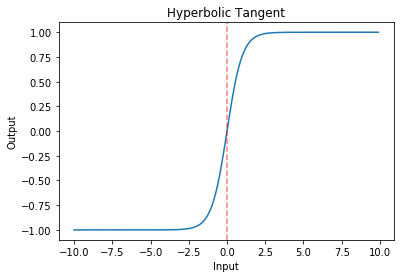

In [12]:
def tanh(x):
    a = []
    for i in x:
        a.append((math.exp(2*i)-1) / (math.exp(2*i)+1))
    return(a)

x = np.arange(-10., 10., 0.1)
y = tanh(x)
plt.plot(x,y)
plt.axvline(x = 0, color = 'r', alpha = .5, linestyle = 'dashed')
plt.title('Hyperbolic Tangent')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

#### 2.3.4 Exponential Linear Units

Besides not having a properly defined gradient at $z=0$, the ReLu suffers from an additional problem. Since ReLUs are non-negative, their mean activation is always larger than zero (*bias shift*) ([Clevert et al. 2016][4]). Counterintuitively, this *bias shift* is not a general problem, since the weights of the subsequent can adjust for this bias. However, additonal learning step might require longer learning. Therefore, learning can be speed up by centering the neuron's activation around zero [LeCub et al. 1991][5] (see also xxx. Batch normalization).  

[Clevert et al. 2016][4] suggest to use the exponential linear units (ELU) in order to center activation via an appropriate activation function, while still assuring the activation to satuate to a negative value with smaller inputs:

$$g(z) = 
\begin{cases}
    z &\text{if $z > 0$}\cr  
    \alpha(exp(z)-1) &\text{if $z \leq 0$}
\end{cases}$$

were $\alpha$ is a hyperparamter controlling the level of saturation for negative inputs. 

- Mean activation close to zero by allowing negative values
- Still solves vanishing gradient problem, by having identity relationship for positive inputs
- Noise-robust by allowing for saturation for negative inputs

[4]: https://arxiv.org/pdf/1511.07289.pdf
[5]: http://yann.lecun.com/exdb/publis/pdf/lecun-kanter-solla-91.pdf

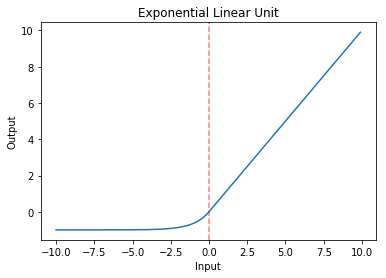

In [15]:
def elu(x, alpha):
    a = []
    for i in x:
        if i > 0:
            a.append(i)
        else:
            a.append(alpha*math.exp(i)-1)
    return(a)

x = np.arange(-10., 10., 0.1)
y = elu(x, 1)
plt.plot(x,y)
plt.axvline(x = 0, color = 'r', alpha = .5, linestyle = 'dashed')
plt.title('Exponential Linear Unit')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()